# K-means Clustering

In [3]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.cluster import KMeans
import functools
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [4]:
def hh_mm_ss2seconds(hh_mm_ss):
    return functools.reduce(lambda acc, x: acc*60 + x, map(int, hh_mm_ss.split(':')))

## Pre-Processing Data

In [5]:
# Paths to datasets
datasets = ['./Data/set1.csv', './Data/set2.csv', './Data/set3noVID.csv']

# Standardize features
features = ['SEQUENCE_DTTM', 'LAT', 'LON', 'SPEED_OVER_GROUND', 'COURSE_OVER_GROUND']

def process_dataset(file_path):
    df = pd.read_csv(file_path, converters={'SEQUENCE_DTTM' : hh_mm_ss2seconds})
    X = df[features]
    scaler = StandardScaler()
    return scaler.fit_transform(X)

# Load and pre-process each dataset
processed_data = [process_dataset(file) for file in datasets]

## Select K

In [9]:
# Range for K
K_range = range(5, 40)

# Lists to store evaluation metrics
average_inertia = []
average_silhouette_scores = []

# For each K, apply k-means clustering and store eval metrics
for K in K_range:
    inertia = []
    silhouette_scores = []

    # For each of the 3 datasets, apply K-means clustering and store evalution metrics for this K
    for data in processed_data:
        kmeans = KMeans(n_clusters=K, random_state=40, n_init=10)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(data, kmeans.labels_))

    # Get the average of 3 datasets for each metric
    average_inertia.append(np.mean(inertia))
    average_silhouette_scores.append(np.mean(silhouette_scores))

### Silhouette Plot

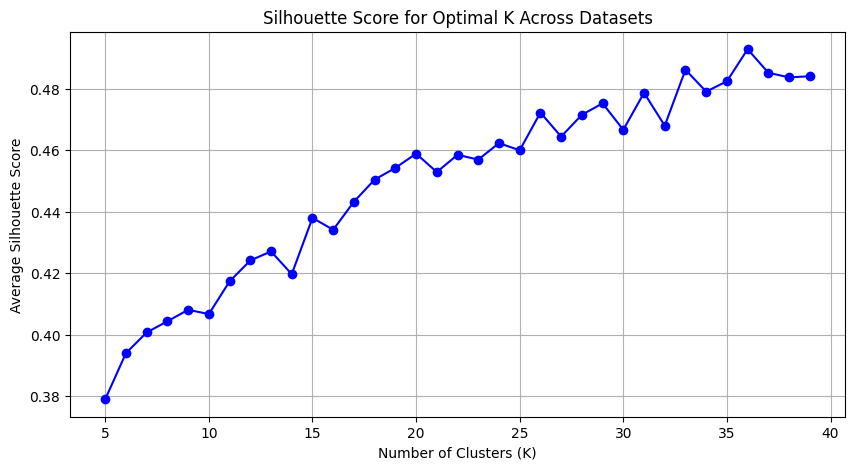

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(K_range, average_silhouette_scores, 'o-b')
plt.title('Silhouette Score for Optimal K Across Datasets')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Average Silhouette Score')
plt.grid(True)
plt.show()

### Elbow Plot

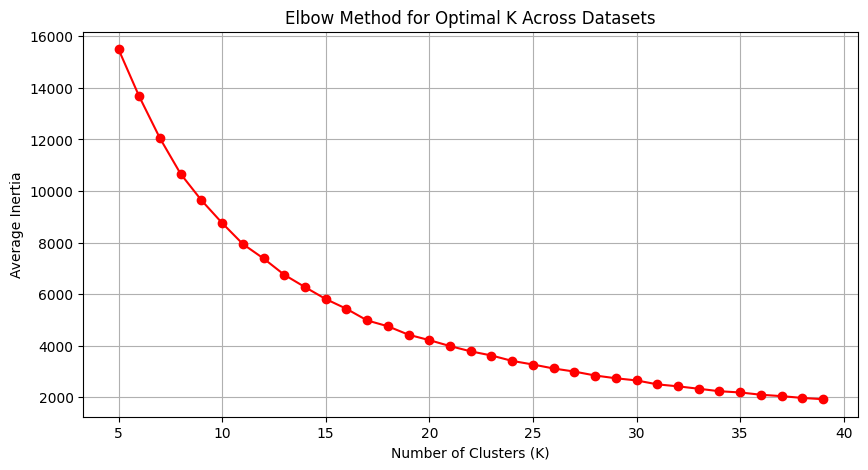

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(K_range, average_inertia, 'o-r')
plt.title('Elbow Method for Optimal K Across Datasets')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Average Inertia')
plt.grid(True)
plt.show()